In [ ]:
from pydub import effects
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from pydub import AudioSegment

In [92]:
def convert_to_wav(input_file, output_file):
    audio = AudioSegment.from_file(input_file)
    audio.export(output_file, format="wav")
    return output_file

In [93]:
def normalize_audio(input_file, output_file):
    audio = AudioSegment.from_file(input_file)
    normalized_audio = effects.normalize(audio)
    normalized_audio.export(output_file, format="wav")
    return output_file

In [94]:
def calculate_features(audio_file):
    # Load audio file
    y, sr = librosa.load(audio_file)

    # Calculate features
    energy = np.sum(np.square(y))
    rms = librosa.feature.rms(y=y)[0][0]
    spect = np.abs(librosa.stft(y))
    spect_db = librosa.amplitude_to_db(spect)
    mel_spect = librosa.feature.melspectrogram(y=y, sr=sr)
    mel_spect_db = librosa.power_to_db(mel_spect, ref=np.max)
    mfccs = librosa.feature.mfcc(y=y, sr=sr)
    cqt_spectrogram = np.abs(librosa.cqt(y, sr=sr))

    return {
        'energy': energy,
        'rms': rms,
        'spect_db' : spect_db,
        'mel_spect_db' : mel_spect_db,
        'mfccs' : mfccs,
        'cqt_spect' : cqt_spectrogram
    }

In [95]:
def combine_spectrograms(spectrograms):

    # Resize all spectrograms to the minimum shape
    resized_spectrograms = [librosa.util.fix_length(spectrogram, size=20) for spectrogram in spectrograms]

    # Take the maximum value at each frequency bin across all spectrograms
    combined_spectrogram = np.max(np.array(resized_spectrograms), axis=0)
    return combined_spectrogram

def plot_spectrograms(combined_spectrogram, title):
    plt.figure(figsize=(10, 5))
    librosa.display.specshow(combined_spectrogram, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.show()

In [96]:
# Function to plot histograms for both car and bus features
def plot_histograms(car_features, bus_features, feature_name):
    plt.figure(figsize=(10, 8))
    plt.title(f'Histograms - {feature_name}')

    plt.hist(car_features, bins=50, alpha=0.5, label='Car', color='blue')
    plt.hist(bus_features, bins=50, alpha=0.5, label='Bus', color='orange')

    plt.xlabel(feature_name)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

def plot_scatter(x, y, xlabel, ylabel, title, color):
    plt.scatter(x, y, alpha=0.5, label=title, color=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()

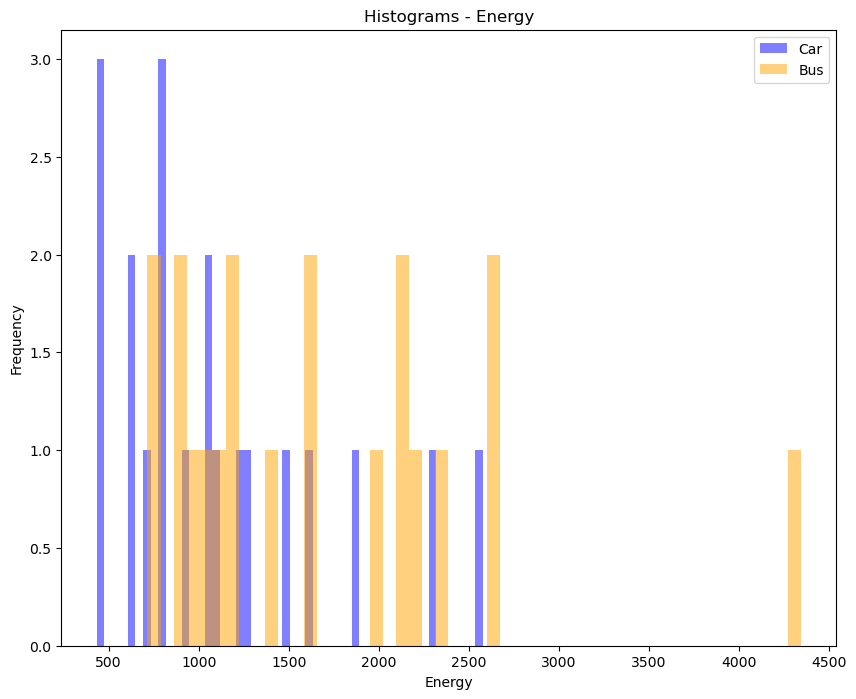

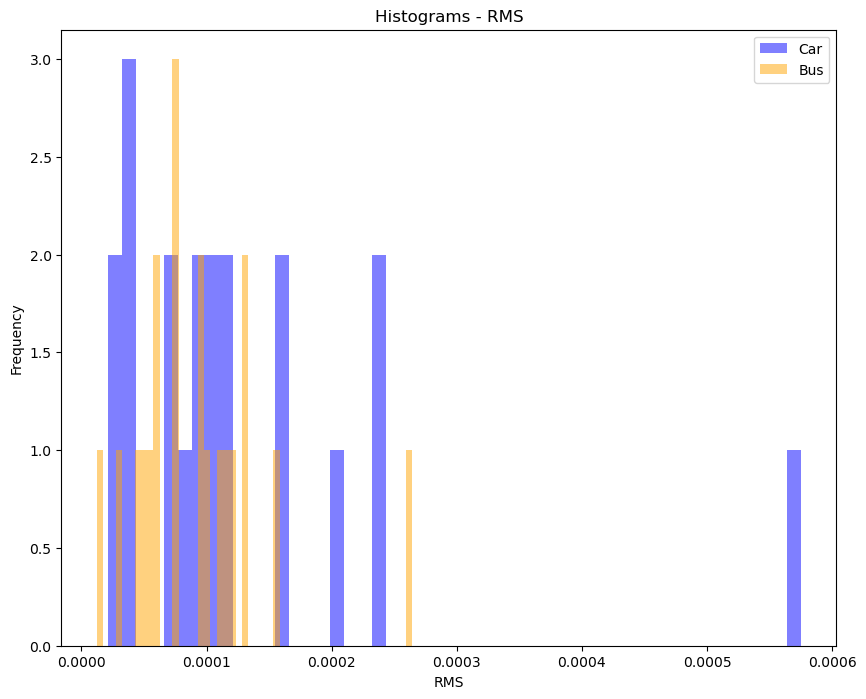

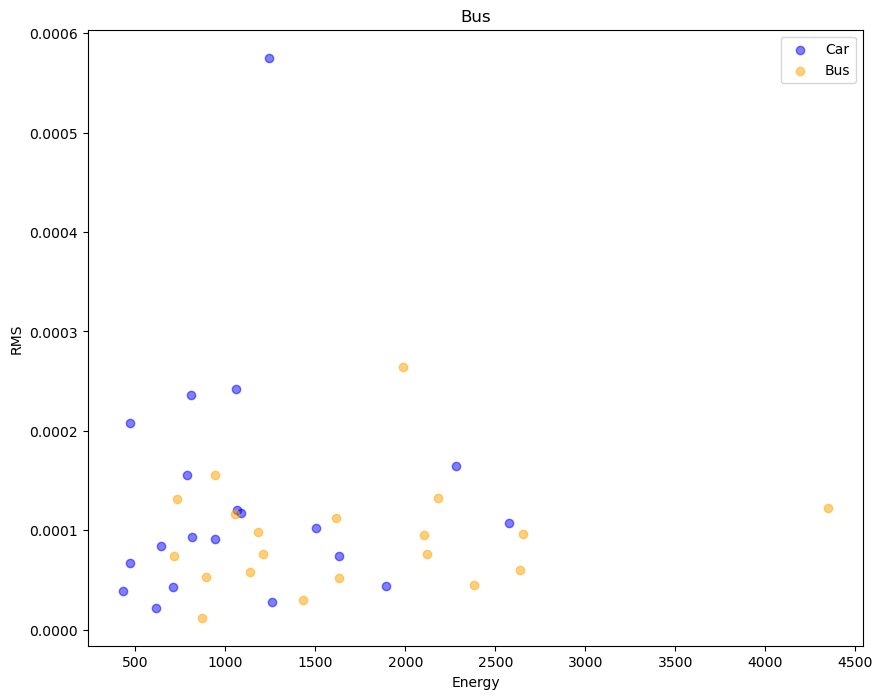

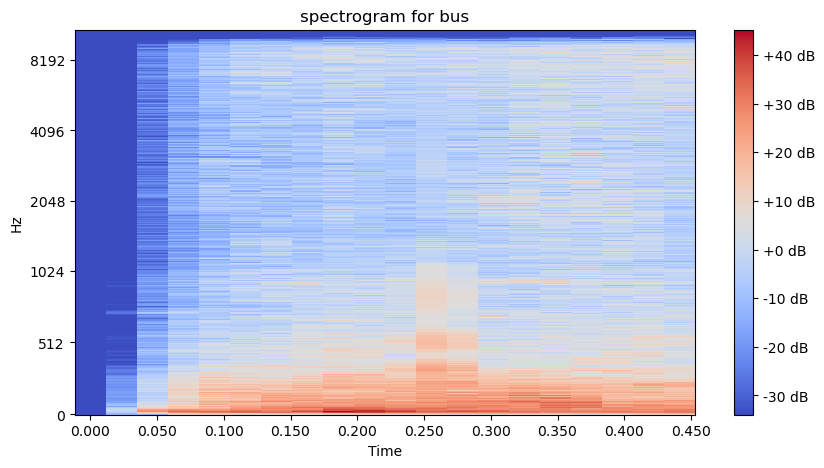

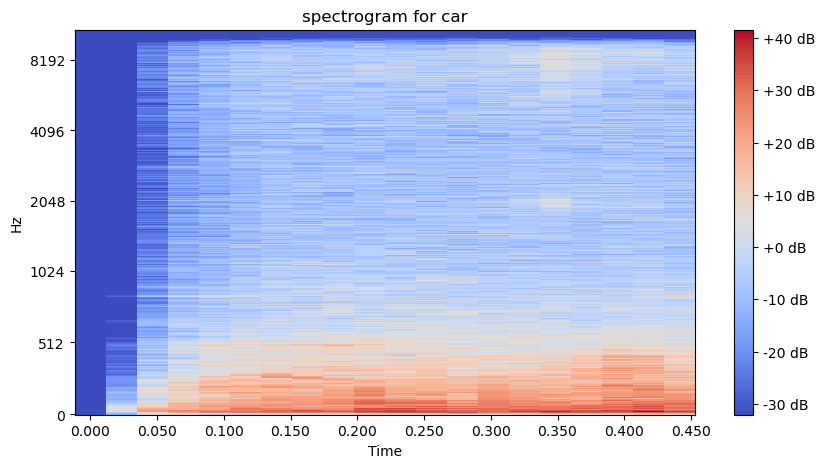

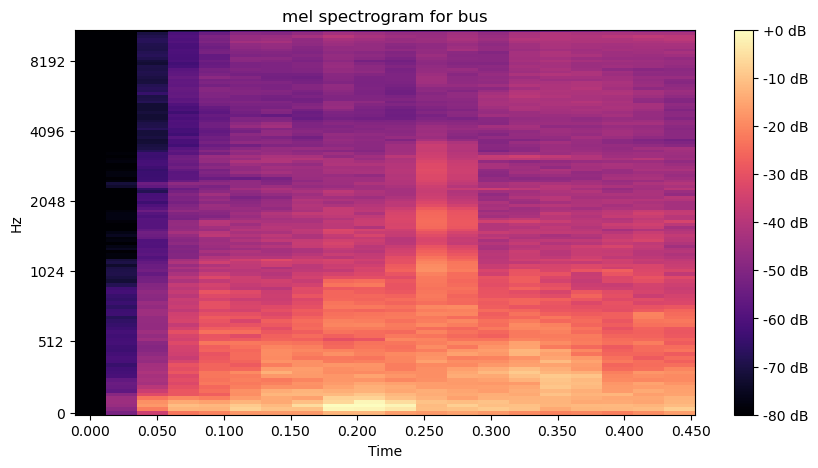

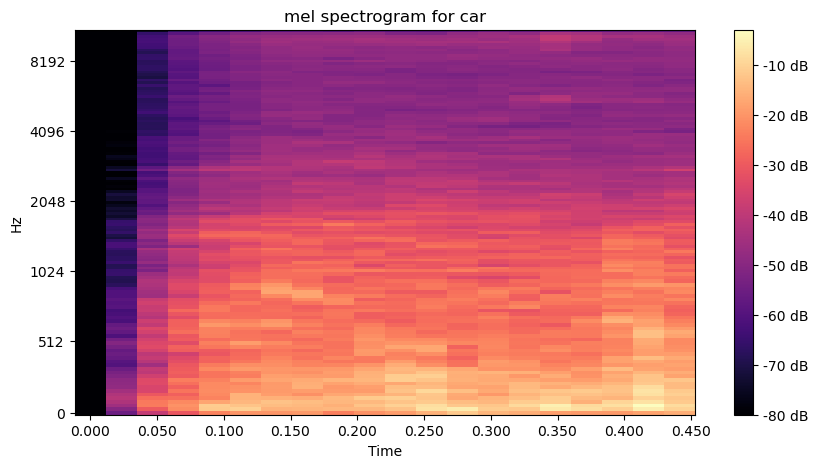

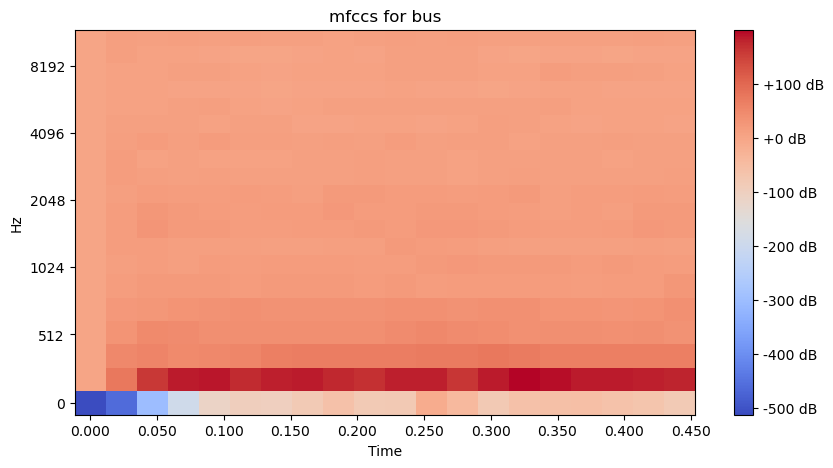

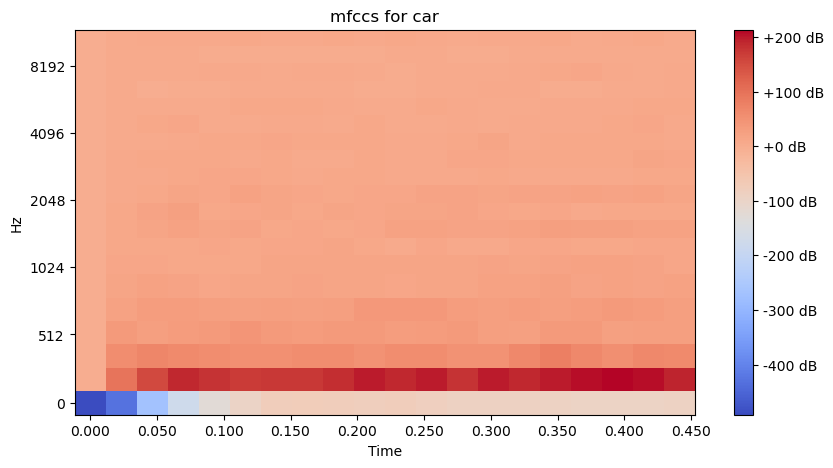

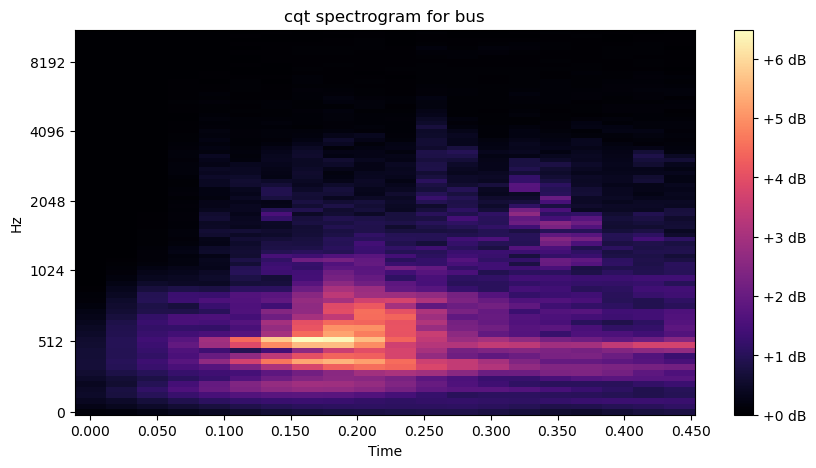

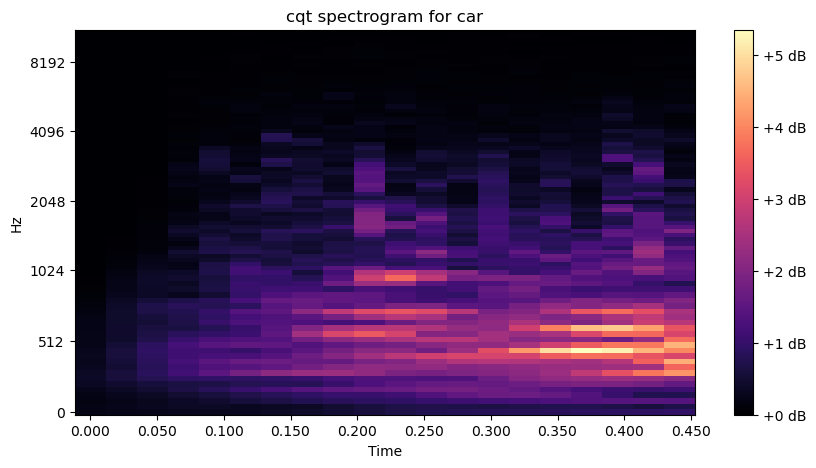

In [97]:
wav_files_car = []
wav_files_bus = []
running_number = 1

for i in range(0, 20):
    input_file_car = f"Car{running_number}.m4a"
    input_file_bus = f"Bus{running_number}.m4a"

    output_file_bus = convert_to_wav(input_file_bus, f"bus{running_number}.wav")
    output_file_car = convert_to_wav(input_file_car, f"car{running_number}.wav")

    normalized_file_bus = normalize_audio(output_file_bus, f"normalized_bus{running_number}.wav")
    normalized_file_car = normalize_audio(output_file_car, f"normalized_car{running_number}.wav")

    wav_files_car.append(normalized_file_car)
    wav_files_bus.append(normalized_file_bus)
    running_number += 1

# Initialize lists to store combined features for car and bus
combined_energy_car = []
combined_energy_bus = []
combined_rms_car = []
combined_rms_bus =  []

spectrograms_bus = []
spectrograms_car = []
mel_spectrograms_bus = []
mel_spectrograms_car = []
mfccs_bus = []
mfccs_car = []
cqt_spectrograms_bus = []
cqt_spectrograms_car = []

# Process car audio files
for car_file in wav_files_car:
    features_car = calculate_features(car_file)
    combined_energy_car.append(features_car['energy'])
    combined_rms_car.append(features_car['rms'])
    spectrograms_car.append(features_car['spect_db'])
    mel_spectrograms_car.append(features_car['mel_spect_db'])
    mfccs_car.append(features_car['mfccs'])
    cqt_spectrograms_car.append(features_car['cqt_spect'])

# Process bus audio files
for bus_file in wav_files_bus:
    features_bus = calculate_features(bus_file)
    combined_energy_bus.append(features_bus['energy'])
    combined_rms_bus.append(features_bus['rms'])
    spectrograms_bus.append(features_bus['spect_db'])
    mel_spectrograms_bus.append(features_bus['mel_spect_db'])
    mfccs_bus.append(features_bus['mfccs'])
    cqt_spectrograms_bus.append(features_bus['cqt_spect'])

# Plot histograms for energy and RMS
plot_histograms(combined_energy_car, combined_energy_bus, 'Energy')
plot_histograms(combined_rms_car, combined_rms_bus, 'RMS')

plt.figure(figsize=(10, 8))

plot_scatter(combined_energy_car, combined_rms_car, 'Energy', 'RMS', 'Car', color='blue')
plot_scatter(combined_energy_bus, combined_rms_bus, 'Energy', 'RMS', 'Bus', color='orange')

plt.show()

# Combine spectrograms
combined_spectrogram_bus = combine_spectrograms(spectrograms_bus)
combined_spectrogram_car = combine_spectrograms(spectrograms_car)
combined_mel_spectrogram_bus = combine_spectrograms(mel_spectrograms_bus)
combined_mel_spectrogram_car = combine_spectrograms(mel_spectrograms_car)

combined_mfccs_bus = combine_spectrograms(mfccs_bus)
combined_mfccs_car = combine_spectrograms(mfccs_car)
combined_cqt_spectrogram_bus = combine_spectrograms(cqt_spectrograms_bus)
combined_cqt_spectrogram_car = combine_spectrograms(cqt_spectrograms_car)

#Plot spectrograms
plot_spectrograms(combined_spectrogram_bus, "spectrogram for bus")
plot_spectrograms(combined_spectrogram_car, "spectrogram for car")
plot_spectrograms(combined_mel_spectrogram_bus, "mel spectrogram for bus")
plot_spectrograms(combined_mel_spectrogram_car, "mel spectrogram for car")

plot_spectrograms(combined_mfccs_bus, "mfccs for bus")
plot_spectrograms(combined_mfccs_car, "mfccs for car")
plot_spectrograms(combined_cqt_spectrogram_bus, "cqt spectrogram for bus")
plot_spectrograms(combined_cqt_spectrogram_car, "cqt spectrogram for car")

In [103]:
import zipfile
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

# Function to extract audio files from a zip archive
def extract_zip(zip_path, output_dir):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(output_dir)

# Replace these paths with the actual paths to your zip files
zip_path_car = '39950__aaroan__car-sounds.zip'
zip_path_bus = '36810__emmakyllikki__bus-noises.zip'

# Temporary directories to store extracted and converted files
temp_dir_car = 'temp_car'
temp_dir_bus = 'temp_bus'

# Extract audio files from the zip files
extract_zip(zip_path_car, temp_dir_car)
extract_zip(zip_path_bus, temp_dir_bus)

# Combine data for both car and bus
X = np.vstack((np.array([combined_energy_car, combined_rms_car]).T, np.array([combined_energy_bus, combined_rms_bus]).T))
y = np.concatenate((np.zeros(len(combined_energy_car)), np.ones(len(combined_energy_bus))))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

# Create a pipeline with standard scaling and k-nearest neighbors classifier
knn_clf = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=11))
])

# Train the KNN classifier
knn_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_clf.predict(X_test)

# Calculate accuracy for KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy (KNN): {accuracy_knn * 100:.2f}%')

# Train a Support Vector Machine (SVM) classifier
svm_clf = SVC(kernel='linear', C=1.0)
svm_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_clf.predict(X_test)

# Calculate accuracy for SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy (SVM): {accuracy_svm * 100:.2f}%')

# Count the number of correct predictions for car and bus using SVM
correct_car_svm = np.sum((y_pred_svm == 0) & (y_test == 0))
correct_bus_svm = np.sum((y_pred_svm == 1) & (y_test == 1))

# Display the results for SVM
print(f'SVM Correct predictions for car: {correct_car_svm}/{np.sum(y_test == 0)}')
print(f'SVM Correct predictions for bus: {correct_bus_svm}/{np.sum(y_test == 1)}')

# Count the number of correct predictions for car and bus using KNN
correct_car_knn = np.sum((y_pred_knn == 0) & (y_test == 0))
correct_bus_knn = np.sum((y_pred_knn == 1) & (y_test == 1))

# Display the results for KNN
print(f'KNN Correct predictions for car: {correct_car_knn}/{np.sum(y_test == 0)}')
print(f'KNN Correct predictions for bus: {correct_bus_knn}/{np.sum(y_test == 1)}')


Accuracy (KNN): 50.00%
Accuracy (SVM): 50.00%
SVM Correct predictions for car: 3/5
SVM Correct predictions for bus: 2/5
KNN Correct predictions for car: 2/5
KNN Correct predictions for bus: 3/5
